In [20]:
import cv2
import numpy as np

def rgb_to_grayscale(image):
    # Split the image into its RGB channels
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Coefficients for converting RGB to grayscale
    alpha = 0.2989
    beta = 0.5870
    gamma = 0.1140
    
    # Compute the grayscale image using the formula I = αR + βG + γB
    grayscale_image = alpha * R + beta * G + gamma * B
    
    return grayscale_image.astype(np.uint8)

# Read the image
path = 'C:\\Users\\saioc\\Desktop\\img\\ser.png'
image = cv2.imread(path)


# Display the original image
cv2.imshow('Original Image', image)
cv2.waitKey(0)

# Convert the image to grayscale
grayscale_image = rgb_to_grayscale(image)

# Display the grayscale image
cv2.imshow('Grayscale Image', grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [21]:
def binarize_image(image, threshold):
    # Binarize the image using the given threshold
    #binary_image = np.where(image >= threshold, 255, 0).astype(np.uint8)
    
    # Perform automatic thresholding using Otsu's method
    _, binary_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary_image

# Function to extract contour using a binary filter
def extract_contour(binary_image):
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #cv2.RETR_EXTERNAL
    return contours

# Select and store gray levels of interest (you can change these values)
gray_levels_of_interest = [85]

# Binarize the image using each selected gray level as the threshold
for threshold in gray_levels_of_interest:
    # Binarize the grayscale image using the threshold
    binary_image = binarize_image(grayscale_image, threshold)
    
    # Display the binary image
    cv2.imshow('Binary Image (Threshold = {})'.format(threshold), binary_image)
    
    # Extract contour using a binary filter
    contours = extract_contour(binary_image)
    
    # Create a blank image filled with zeros, matching the size of the binary image
    contour_image = np.zeros_like(binary_image)
    
    # Draw contours on the blank image
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1)
    
    # Make the first two and last two rows black
    contour_image[:2, :] = 0
    contour_image[-2:, :] = 0
    
    # Make the first and last columns black
    contour_image[:, :2] = 0
    contour_image[:, -2:] = 0

    
    # Display the contour image
    cv2.imshow('Contours (Threshold = {})'.format(threshold), contour_image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()



In [74]:
print("Data type of contour_image:", contour_image.dtype)
print("Shape of contour_image:", contour_image.shape)
np.savetxt('contour_image.txt', contour_image, fmt='%d')

Data type of contour_image: uint8
Shape of contour_image: (514, 500)


Square size:  425
Square size:  213
Square size:  107
Square size:  54
Square size:  27
Square size:  14
Square size:  7
Square size:  4
Square size:  2
Square size:  1
Box uri totale [4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144, 1048576]
box uri gasite [4, 16, 60, 238, 884, 3010, 10771, 24209, 51456, 93798]
log n  [1.3862943611198906, 2.772588722239781, 4.1588830833596715, 5.545177444479562, 6.931471805599453, 8.317766166719343, 9.704060527839234, 11.090354888959125, 12.476649250079015, 13.862943611198906]
log N_A_n  [1.3862943611198906, 2.772588722239781, 4.0943445622221, 5.472270673671475, 6.784457062637643, 8.009695357742922, 9.28461261635077, 10.094479743833253, 10.848482352538639, 11.44889881280538]


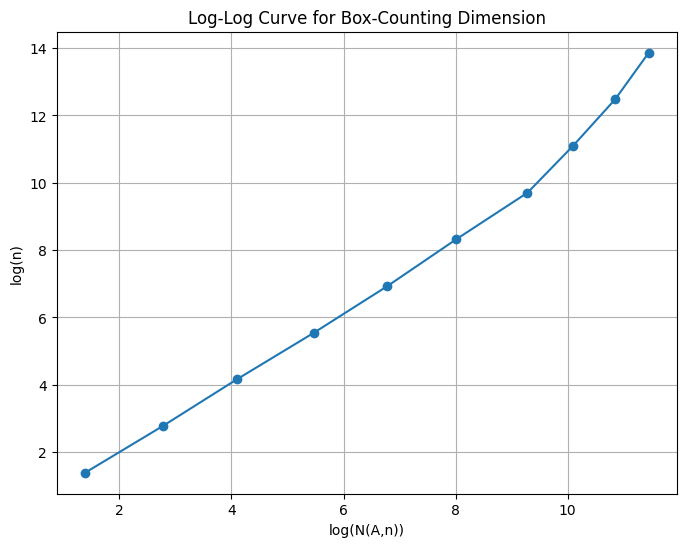

Box-Counting Dimension (D_bc) ≈ 1.1890


In [22]:
import math
from matplotlib import pyplot as plt

# Function to calculate box-counting dimension
def calculate_box_counting_dimension(contours, contour_image):
    # Initialize lists to store log2(n) and log(N(A,n))
    log2n_values = []
    log_N_values = []
    n_values = []
    N_A_n_values = []
    logsqt = []


    # Initialize n and N(A,n)
    i = 0 
    n = 4**i # number of boxes
    N_A_n = 1
    
    # Copy the original binary image to draw boxes
    image_with_boxes = np.copy(contour_image)
    
    # Loop through the contour points
    while True:
        i += 1
        # Update number of boxes
        n = 4**i
        
        # Initialize count of squares containing contour points
        count = 0
        
        # Calculate the size of each square based on the current value of n
        square_size = int(np.ceil(math.sqrt(max(contour_image.shape)*max(contour_image.shape) / n)))
        print("Square size: " , square_size)
        
        # Loop through the image area and check if each square contains the contour
        for y in range(0, contour_image.shape[0], square_size):
            for x in range(0, contour_image.shape[1], square_size):
                # Define the coordinates of the current square
                square = contour_image[y:y+square_size, x:x+square_size]
                
                # Check if the square contains any contour points
                if np.any(square == 255):
                    count += 1
                    # Draw the bounding box on the image
                    cv2.rectangle(image_with_boxes, (x, y), (x+square_size, y+square_size), (255, 0, 0), 1)
                    
        
         # Display the image with drawn boxes
        cv2.imshow("Image with Boxes", image_with_boxes)
        cv2.waitKey(0)
        
        # Update N(A,n)
        N_A_n = count
        
        # Store n and N_A_n values
        n_values.append(n)
        N_A_n_values.append(N_A_n)
        
        # Store log2(n) and log(N(A,n))
        log2n_values.append(np.log(n))
        log_N_values.append(np.log(N_A_n))
        logsqt.append(np.log(math.sqrt(n)))

        # Check if box size reaches the minimum threshold
        if square_size <= 1:
            break
        
 
    
    return n_values, N_A_n_values, log2n_values, log_N_values, logsqt

# Call the function to get n, N_A_n, log2(n), and log(N_A_n)
n_values, N_A_n_values, log2n_values, log_N_values, logsqt = calculate_box_counting_dimension(contours, contour_image)

print('Box uri totale', n_values)
print('box uri gasite', N_A_n_values)

print('log n ', log2n_values)
print('log N_A_n ', log_N_values)

# Plot log-log curve
plt.figure(figsize=(8, 6))
plt.plot(log_N_values, log2n_values, marker='o', linestyle='-')
plt.title('Log-Log Curve for Box-Counting Dimension')
plt.ylabel('log(n)')
plt.xlabel('log(N(A,n))')
plt.grid(True)
plt.show()

# Convert lists to NumPy arrays for arithmetic operations
log2n_values = np.array(log2n_values)
log_N_values = np.array(log_N_values)

# Calculate the box-counting dimension using the formula
numerator = len(log2n_values) * np.sum(log2n_values * log_N_values) - np.sum(log2n_values) * np.sum(log_N_values)
denominator = len(log2n_values) * np.sum(np.square(log_N_values)) - np.square(np.sum(log_N_values))


box_counting_dimension = numerator / denominator




print("Box-Counting Dimension (D_bc) ≈ {:.4f}".format(box_counting_dimension))
cv2.destroyAllWindows()

In [41]:
import numpy as np

# Datele din enunț
log_N_A_n_values = np.array([1.3862943611198906, 2.772588722239781, 4.1588830833596715, 5.545177444479562, 6.931471805599453, 8.317766166719343, 9.704060527839234, 11.090354888959125])
log_n_values = np.array([1.3862943611198906, 2.302585092994046, 3.091042453358316, 3.912023005428146, 4.672828834461906, 5.429345628954441, 6.008813185442595, 6.504288173536645])

# Calculul pantei dreptei folosind metoda celor mai mici pătrate
slope = np.sum((log_n_values - np.mean(log_n_values)) * (log_N_A_n_values - np.mean(log_N_A_n_values))) / np.sum((log_n_values - np.mean(log_n_values)) ** 2)

print("Panta dreptei:", slope)


Panta dreptei: 1.8615168768354573


In [ ]:
import numpy as np
import pylab as pl

image=rgb_to_grayscale(pl.imread("C:\\Users\\saioc\\Desktop\\Leaf\\Leaf_8.jpg"))
binary_image=binarize_image(image, 230)


# finding all the non-zero pixels
pixels=[]
for i in range(binary_image.shape[0]):
    for j in range(binary_image.shape[1]):
        if image[i,j]>0:
            pixels.append((i,j))

Lx=binary_image.shape[1]
Ly=binary_image.shape[0]
print (Lx, Ly)
pixels=pl.array(pixels)
print (pixels.shape)
 
# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 1, num=13, endpoint=False, base=2)
Ns=[]
# looping over several scales
for scale in scales:
    print ("======= Scale :",scale)
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))
 
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')
#pl.savefig('sierpinski_dimension.pdf')
 
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient
#np.savetxt("scaling.txt", list(zip(scales,Ns)))

print(scales)
print(Ns)

|	Nr	|	r	|S	|
|    106072	|  0.005000	|   2	|
|    106072	|  0.006371	|   2	|
|     55625	|  0.008119	|   3	|
|     32788	|  0.010346	|   4	|
|     21315	|  0.013183	|   5	|
|     14920	|  0.016799	|   6	|
|      8283	|  0.021407	|   8	|
|      5211	|  0.027278	|  10	|
|      3019	|  0.034760	|  13	|
|      1753	|  0.044293	|  17	|
|       999	|  0.056442	|  22	|
|       623	|  0.071922	|  28	|
|       373	|  0.091649	|  36	|
|       206	|  0.116786	|  46	|
|       118	|  0.148818	|  59	|
|        75	|  0.189635	|  75	|
|        56	|  0.241647	|  96	|
|        35	|  0.307924	| 123	|
|        18	|  0.392380	| 156	|
|        13	|  0.500000	| 199	|


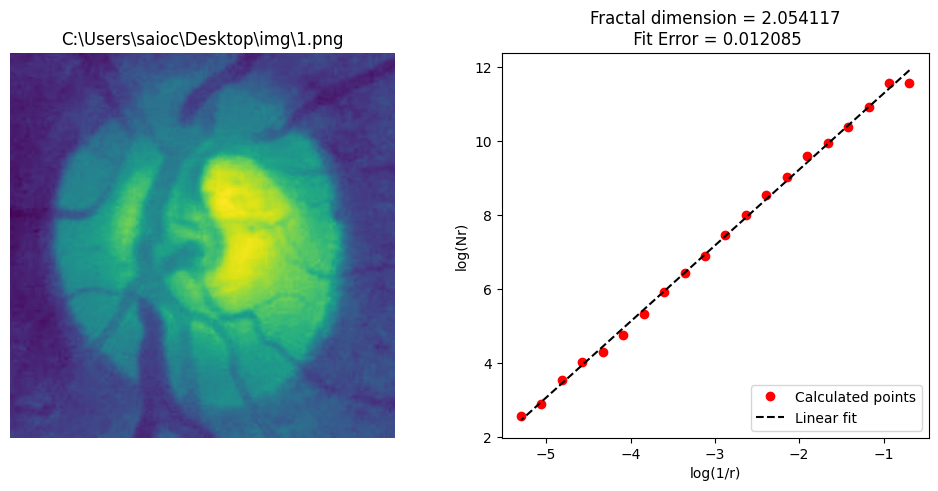

In [36]:
#calcul fractali

import matplotlib.pyplot as plt
from PIL import Image,ImageFilter
import numpy as np
import math


def dbc(img,s):
    (width, height) = img.size
    # check width == height
    assert(width == height)
    pixel = img.load()
    M = width
    # grid size must be bigger than 2 and least than M/2
    G = 256
    assert(s >= 2)
    assert(s <= M//2)
    ngrid = math.ceil(M / s)
    h = G*(s / M) # box height
    grid = np.zeros((ngrid,ngrid), dtype='int32')
    
    for i in range(ngrid):
        for j in range(ngrid):
            maxg = 0
            ming = 255
            for k in range(i*s, min((i+1)*s, M)):
                for l in range(j*s, min((j+1)*s, M)):
                    if pixel[k, l] > maxg:
                        maxg = pixel[k, l]

                    if pixel[k, l] < ming:
                        ming = pixel[k, l]
                        
            grid[i,j] = math.ceil(maxg/h) - math.ceil(ming/h) + 1

    Ns = 0
    for i in range(ngrid):
        for j in range(ngrid):
            Ns += grid[i, j]
    return Ns


def sdbc(img,s):
    (width, height) = img.size
    # check width == height
    assert(width == height)
    pixel = img.load()
    M = width
    # grid size must be bigger than 2 and least than M/2
    G = 256
    assert(s >= 2)
    assert(s <= M//2)
    ngrid = math.ceil(M / s)
    h = G*(s / M) # box height
    grid = np.zeros((ngrid,ngrid), dtype='int32')
    
    for i in range(ngrid):
        for j in range(ngrid):
            maxg = 0
            ming = 255
            for k in range(i*s, min((i+1)*s, M)):
                for l in range(j*s, min((j+1)*s, M)):
                    if pixel[k, l] > maxg:
                        maxg = pixel[k, l]

                    if pixel[k, l] < ming:
                        ming = pixel[k, l]
                        
            grid[i,j] = math.ceil((maxg-ming+1)/h)

    Ns = 0
    for i in range(ngrid):
        for j in range(ngrid):
            Ns += grid[i, j]
    return Ns
    


if __name__ == '__main__':
    path = str(input("Enter path to image:"))
    image = Image.open(path) # Brodatz/D1.gif
    image = image.convert('L')
    
    # Convert image to numpy array
    #image_array = np.array(image)
    
    # Extract the red channel (first channel)
    #image = image_array[:, :, 1]
    #image = Image.fromarray(image)
    
    (imM, _) = image.size
    
    # calculate Nr and r
    Nr = []
    r = []
    print("|\tNr\t|\tr\t|S\t|")
    a = 2
    b = imM//2
    nval = 20
    lnsp = np.linspace(1,math.log(b,a),nval)
    sval  = a**lnsp
	
    for S in sval:#range(2,imM//2,(imM//2-2)//100):
        Ns = dbc(image, int(S))
        Nr.append(Ns)
        R = S/imM
        r.append(S)
        print("|%10d\t|%10f\t|%4d\t|"% (Ns,R,S))
	
	
    # calculate log(Nr) and log(1/r)    
    y = np.log(np.array(Nr))
    x = np.log(1/np.array(r))
    (D, b) = np.polyfit(x, y, deg=1)
    
    # search fit error value
    N = len(x)
    Sum = 0
    for i in range(N):
        Sum += (D*x[i] + b - y[i])**2
        
    errorfit = (1/N)*math.sqrt(Sum/(1+D**2))
    
    # figure size 10x5 inches
   # Create the figure
    fig = plt.figure(figsize=(10, 5))
    fig.canvas.manager.set_window_title('Fractal Dimension Calculate')
    plt.subplots_adjust(left=0.04,right=0.98)
    plt.subplot(121)
    plt.title(path)
    plt.imshow(image)
    plt.axis('off')

    
    plt.subplot(122)  
    plt.title('Fractal dimension = %f\n Fit Error = %f' % (D,errorfit))
    
    plt.plot(x, y, 'ro',label='Calculated points')
    plt.plot(x, D*x+b, 'k--', label='Linear fit' )
    plt.legend(loc=4)
    plt.xlabel('log(1/r)')
    plt.ylabel('log(Nr)')
    plt.show()

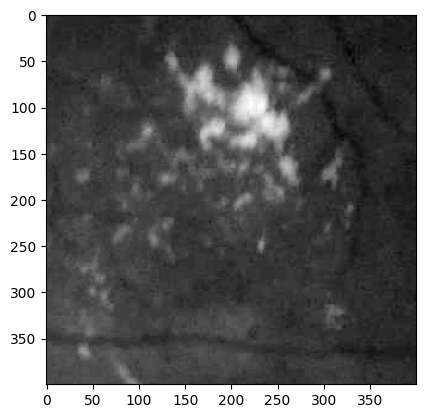

0.017102246641848604


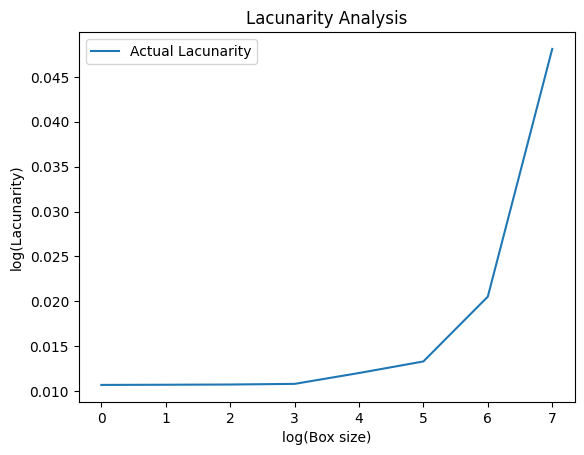

In [17]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

class IntegralImage:
    def __init__(self, img):
        self.int_img = np.zeros(img.shape, dtype='int')
        
        for y in range(img.shape[0]):
            zeile = 0
            for x in range(img.shape[1]):
                zeile += img[y,x]
                self.int_img[y,x] = self.int_img[y-1,x] + zeile 
    
    
    def sum(self, p1, box_size):
        s = self.int_img[p1[0]+box_size[0]-1, p1[1]+box_size[1]-1]
        if p1[0]>0:
            s -= self.int_img[p1[0]-1, p1[1]+box_size[1]-1]
        if p1[1]>0:
            s -= self.int_img[p1[0]+box_size[0]-1, p1[1]-1]
        if p1[0]>0 and p1[1]>0:
            s += self.int_img[p1[0]-1, p1[1]-1]
        return s
        

def analyze_lacunarity(img, box_sizes=[1,2,4,8,16,32,64,128]):
    result_lac = []  # Store lacunarity values for each box size
    for r in box_sizes:
        lacunarity_per_step = []  # Store lacunarity values for each step
        
        # Loop over different steps for the given box size
        for step_y in range(r):
            for step_x in range(r):
                # Extract pixels within the current step window
                window_pixels = img[step_y::r, step_x::r]
                
                # Calculate standard deviation and mean of pixel values in the window
                std_dev = np.std(window_pixels)
                mean = np.mean(window_pixels)
                
                # Calculate lacunarity for the current step
                lacunarity = (std_dev / mean) ** 2
                lacunarity_per_step.append(lacunarity)
        
        # Calculate the maximum lacunarity value for the current box size
        max_lacunarity = max(lacunarity_per_step)
        result_lac.append(max_lacunarity)
    
    return result_lac



def fit_and_predict(fx, fy, predict):
    func_linear = lambda params,x: params[0]*x+params[1]
    error_func  = lambda params,fx,fy: func_linear(params,fx)-fy
    final_params,success = leastsq(error_func,(1.0,2.0),args=(np.asarray(fx),np.asarray(fy)))
    predict = func_linear(final_params,predict)
    rmse = np.sqrt(np.mean((predict-fy)**2))
    return predict, rmse


def main():
    # Load image from your computer
    image_path = "C:\\Users\\saioc\\Desktop\\img\\14_A.png"
    img = np.array(Image.open(image_path).convert('L'))  # Convert to grayscale
    
    plt.imshow(img, interpolation="none", cmap="gray")
    plt.show()

    la = analyze_lacunarity(img)
    average = sum(la)/len(la)
    print(average)

    plt.plot(la)
    plt.xlabel("log(Box size)")
    plt.ylabel("log(Lacunarity)")
    plt.legend(["Actual Lacunarity", "Predicted Lacunarity"])
    plt.title("Lacunarity Analysis")
    plt.show()
    
    

if __name__ == "__main__":
    main()


In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression

def differential_box_counting(image, r):
    # Convert the image to grayscale if it's not already in grayscale
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)

    # Calculate image dimensions
    height, width = image.shape

    # Initialize an empty list to store the points (log 1/r, log Nr)
    points = []

    # Iterate over different values of r
    for r_value in r:
        # Initialize an empty list to store the differences for each box
        differences = []

        # Iterate over the grid
        for u in range(0, height, r_value):
            for v in range(0, width, r_value):
                # Calculate the maximum and minimum intensity values for the current box
                box = image[u:u+r_value, v:v+r_value]
                max_intensity = np.max(box)
                min_intensity = np.min(box)

                # Calculate the difference and add 1 to avoid zero values
                difference = max_intensity - min_intensity + 1
                differences.append(difference)

        # Calculate the sum of differences for this r_value
        Nr = np.sum(differences)

        # Calculate the point (log 1/r, log Nr)
        points.append([np.log(1/r_value), np.log(Nr)])

    # Perform linear regression to estimate the slope
    points = np.array(points)
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(X, y)

    # The slope of the regression line represents the approximate fractal dimension
    fractal_dimension = model.coef_[0]

    return fractal_dimension

# Example usage
path = str(input("Enter path to image: "))
image = Image.open(path)
image = image.convert('L')
image = np.array(image)

r_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]  # Different values of r
fractal_dimension = differential_box_counting(image, r_values)
print("Approximate fractal dimension:", fractal_dimension)




Approximate fractal dimension: 1.0849438673011345


In [74]:

import numpy as np
from sklearn.linear_model import LinearRegression

def differential_box_counting(image, r):
    # Convert the image to grayscale if it's not already in grayscale
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)

    # Calculate image dimensions
    height, width = image.shape

    # Initialize an empty list to store the points (log 1/r, log Nr)
    points = []

    # Iterate over different values of r
    for r_value in r:
        # Initialize an empty list to store the differences for each box
        differences = []

        # Iterate over the grid
        for u in range(0, height, r_value):
            for v in range(0, width, r_value):
                # Calculate the maximum and minimum intensity values for the current box
                box = image[u:u+r_value, v:v+r_value]
                max_intensity = np.max(box)
                min_intensity = np.min(box)

                # Calculate the difference and add 1 to avoid zero values
                difference = max_intensity - min_intensity + 1
                differences.append(difference)

        # Calculate the sum of differences for this r_value
        Nr = np.sum(differences)

        # Calculate the point (log 1/r, log Nr)
        points.append([np.log(1/r_value), np.log(Nr)])

    # Perform linear regression to estimate the slope
    points = np.array(points)
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(X, y)

    # The slope of the regression line represents the approximate fractal dimension
    fractal_dimension = model.coef_[0]

    return fractal_dimension

def calculate_lacunarity(image, r):
    # Convert the image to grayscale if it's not already in grayscale
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)

    # Calculate image dimensions
    height, width = image.shape

    # Initialize arrays to store N and P values
    N_values = []
    P_values = []

    # Iterate over different values of r
    for r_value in r:
        # Initialize a dictionary to store counts of differences for each box
        difference_counts = {}

        # Iterate over the grid
        for u in range(0, height, r_value):
            for v in range(0, width, r_value):
                # Calculate the maximum and minimum intensity values for the current box
                box = image[u:u+r_value, v:v+r_value]
                max_intensity = np.max(box)
                min_intensity = np.min(box)

                # Calculate the difference and add 1 to avoid zero values
                difference = max_intensity - min_intensity + 1

                # Update the count of this difference
                if difference in difference_counts:
                    difference_counts[difference] += 1
                else:
                    difference_counts[difference] = 1

        # Calculate N and P values
        N = sum(difference_counts.values())
        P = {k: v / N for k, v in difference_counts.items()}

        # Store N and P values
        N_values.append(N)
        P_values.append(P)

    # Calculate lacunarity
    numerator = sum([N ** 2 * sum([k ** 2 * v for k, v in P.items()]) for N, P in zip(N_values, P_values)])
    denominator = sum([N * sum([k * v for k, v in P.items()]) for N, P in zip(N_values, P_values)]) ** 2
    lacunarity = numerator / denominator

    return lacunarity

# Example usage

path = str(input("Enter path to image: "))
image = Image.open(path)
image = image.convert('L')
image = np.array(image)
r_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]  # Different values of r
fractal_dimension = differential_box_counting(image, r_values)
lacunarity = calculate_lacunarity(image, r_values)
print("Approximate fractal dimension:", fractal_dimension)
print("Lacunarity:", lacunarity)


Approximate fractal dimension: 1.1097037062132815
Lacunarity: 0.32459732481423476


In [10]:
import cv2
import numpy as np
from PIL import Image
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray


# Load grayscale image
image1 = cv2.imread('C:\\Users\\saioc\\Desktop\\img\\16_A.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('C:\\Users\\saioc\\Desktop\\img\\14_A.png', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('C:\\Users\\saioc\\Desktop\\img\\1.png', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('C:\\Users\\saioc\\Desktop\\img\\42_A.png', cv2.IMREAD_GRAYSCALE)


# Generate GLCM
distances = [50] # Offset
angles = [0]  # Vertical Direction
glcm1 = graycomatrix(image1, distances=distances, angles=angles,levels=255)
glcm2 = graycomatrix(image2, distances=distances, angles=angles,levels=255)
glcm3 = graycomatrix(image3, distances=distances, angles=angles,levels=255)
glcm4 = graycomatrix(image4, distances=distances, angles=angles,levels=255)



# Calculate Features from GLCM
contrast = graycoprops(glcm1, 'contrast')
dissimilarity = graycoprops(glcm1, 'dissimilarity')
homogeneity = graycoprops(glcm1, 'homogeneity')
energy = graycoprops(glcm1, 'energy')
correlation = graycoprops(glcm1, 'correlation')

contrast2 = graycoprops(glcm2, 'contrast')
dissimilarity2 = graycoprops(glcm2, 'dissimilarity')
homogeneity2 = graycoprops(glcm2, 'homogeneity')
energy2 = graycoprops(glcm2, 'energy')
correlation2 = graycoprops(glcm2, 'correlation')

contrast3 = graycoprops(glcm3, 'contrast')
dissimilarity3 = graycoprops(glcm3, 'dissimilarity')
homogeneity3 = graycoprops(glcm3, 'homogeneity')
energy3 = graycoprops(glcm3, 'energy')
correlation3 = graycoprops(glcm3, 'correlation')

contrast4 = graycoprops(glcm4, 'contrast')
dissimilarity4 = graycoprops(glcm4, 'dissimilarity')
homogeneity4 = graycoprops(glcm4, 'homogeneity')
energy4 = graycoprops(glcm4, 'energy')
correlation4 = graycoprops(glcm4, 'correlation')

# Print results
print("Contrast:", contrast, contrast2, contrast3, contrast4)
print("Energy:", energy, energy2, energy3, energy4)
print("Correlation:", correlation, correlation2, correlation3, correlation4)
print("Homogeneity:", homogeneity, homogeneity2, homogeneity3, homogeneity4)
print("Dissimilarit:", dissimilarity, dissimilarity2, dissimilarity3, dissimilarity4)


Contrast: [[152.10843571]] [[146.15527143]] [[930.61309286]] [[703.24447857]]
Energy: [[0.05134001]] [[0.05021251]] [[0.01303299]] [[0.0134475]]
Correlation: [[0.42227727]] [[0.40752633]] [[0.60525455]] [[0.56450845]]
Homogeneity: [[0.20467375]] [[0.1957625]] [[0.04904538]] [[0.04460341]]
Dissimilarit: [[7.28452143]] [[7.08921429]] [[23.43745]] [[21.13790714]]


In [1]:
import cv2
import numpy as np
from PIL import Image
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray


# Load grayscale image
image = cv2.imread('C:\\Users\\saioc\\Desktop\\img\\1.png', cv2.IMREAD_GRAYSCALE)

   # Generate GLCM
distances = [1]  # Define distance for neighboring pixels
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Define angles for texture direction
glcm = graycomatrix(image, distances=distances, angles=angles, levels=256)

    # Calculate features from GLCM
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')

    # Calculate entropy
entropy = -np.sum(glcm * np.log(glcm + 1e-10))

    # Calculate mean intensity
intensities = np.arange(256).reshape((256, 1, 1, 1))
mean_intensity = np.sum(intensities * glcm)

    # Calculate variance
variance = np.sum(np.square(intensities - mean_intensity) * glcm)

    